# NaiveIdentifier: Test

In this notebook, we test our implementation of a basic language identifier using __naive bayes__. The goal is primarily to ensure we understood how the langid works.  


## About our model

The naive bayes model works like this.

During __training__, we create one vectorizer per language. This vectorizer can be an instance of the scikit learn `TfIdfVectorizer` or any other implementation (for example our `NaiveVectorizer`). The important thing is that it defines a `fit` and a `transform` method.

To __predict__ the language of a new sentence, we compute a score for each language we know and then return the one with the "highest" score. This language score is computer as such:

- transform the sentence into a document-ngram matrix using the vectorizer created by fit
- apply the logarithm to every cell != 0
- sum the logs

In other words: sum the posterior probabilities of each ngrams in the sentence given the current language.

__Important__: here, we _do not_ sanitize the data. Better results might thus be achieved by removing punctuation and other non-words from the samples.

## Loading data

In [12]:
%run notebook_utils.py

In [13]:
import matplotlib
SMALL_SIZE = 20
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [14]:
X_train, X_test, y_train, y_test = load_split_data()
X_valid, y_valid = load_validation_data()

## Importing the langid package

In [17]:
cd ..
from langid import NaiveIdentifier
cd -

/Users/Lin/git/SwigSpot/language-detection/notebooks


## Testing the NaiveIdentifier (trigrams, features=3000 per lang)

### Instantiate and train
Here, we decide to use the scikit vectorizer with the basic options.

In [18]:
clf = NaiveIdentifier() # use default options, i.e. TfIdfVectorizer with ngram_range=3, max_features=3000, tf, no idf

Fit using training data, then predict the language of our test and validation sets.

In [19]:
%%time
_ = clf.fit(X_train, y_train)

CPU times: user 11 s, sys: 712 ms, total: 11.7 s
Wall time: 12 s


### Evaluate on the test set

TEST SET
             precision    recall  f1-score   support

         de     0.9699    0.9904    0.9800      1462
         fr     0.9959    0.9980    0.9969      1468
         en     0.9871    0.9980    0.9926      1538
         it     0.9926    1.0000    0.9963      1482
         sg     0.9913    0.9485    0.9694      1438

avg / total     0.9874    0.9873    0.9872      7388



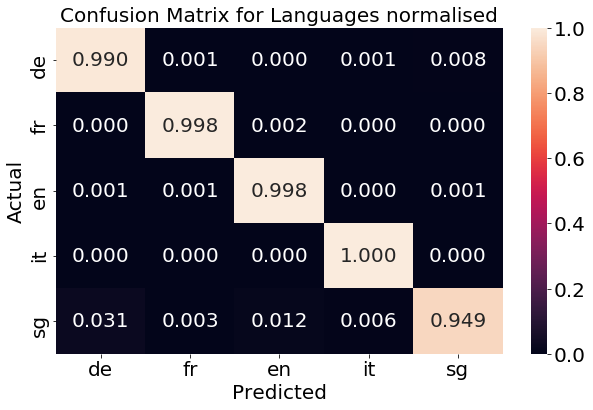

CPU times: user 7.37 s, sys: 138 ms, total: 7.51 s
Wall time: 7.53 s


In [20]:
%%time
print("TEST SET")
print("========")
y_pred = clf.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)


### Evaluate recall on the Swiss German SMS

In [21]:
%%time
print("SMS RECALL")
print("==========")
test_recall_with_sms(clf)

SMS RECALL
total samples    10692
total errors       328 (3.07%)
---------------------------------
languages detected
    de      217
    fr       24
    en       41
    it       46
    sg    10364
CPU times: user 9.05 s, sys: 90.9 ms, total: 9.14 s
Wall time: 9.16 s


### Evaluate on the validation set



VALIDATION SET
             precision    recall  f1-score   support

         de     0.9374    0.9916    0.9637      2613
         fr     0.9973    0.9981    0.9977      2613
         en     0.9928    0.9996    0.9962      2613
         it     0.9973    0.9989    0.9981      2613
         sg     0.9934    0.9269    0.9590      2613

avg / total     0.9837    0.9830    0.9829     13065



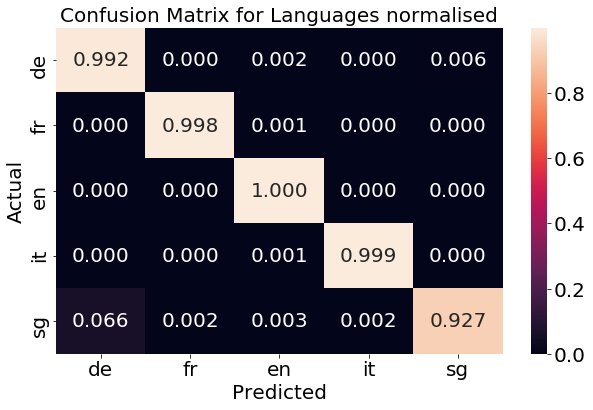

Errors per language:

  de:   22
  fr:    5
  en:    1
  it:    3
  sg:  191

Sample errors:

real|predicted  <sentence>
--------------------------
  sg|en   Republik - Osten (Punta Cana) Dom.
  sg|de   Die Frontseite der Maschine wird dominiert durch die klassische E61 Brühgruppe.
  sg|de   Die Schweiz in Fotografien 1840-1960», Limmat Verlag, Zürich 2009.
  sg|de   Kläui, Hans: Familiennamen verraten abgegangene Siedlungen, in: Zürcher Chronik (1955), 56-57.
  sg|de   Betreff des Beitrags: Re: Mahashivaratri Verfasst: Mo 10. Mär 2008, 19:08 Registriert: Fr 29. Jun 2007, 11:25 In Gokarna, in Karnataka (schribt mer das so?) das isch ca.80 Kilometer unter Palolem.
  sg|de   Jakobs-Strasse 395, Basel 4052 Schweiz 10.9 km von Engel Hotel Liestal Nr.
  sg|fr   Eine Pension bzw.
  sg|de   I dä Kantonshauptstadt vom Thurgau.
  sg|de   Birchler, Linus: Die Kunstdenkmäler des Kantons Schwyz.
  sg|en   Würd sofort nomol go.
  sg|fr   Theologischer Verlag Zürich 2015, für: Revue d'Histoire Ecclé

In [22]:
print("\n\nVALIDATION SET")
print("===============")
y_pred = clf.predict(X_valid)
print_results(y_valid, y_pred)
plot_confusion_matrix(y_valid, y_pred, normalised=True)

print_errors_per_lang(y_valid, y_pred)
print_sample_errors(X_valid, y_valid, y_pred, limit=30)

## Using less features

TEST SET
             precision    recall  f1-score   support

         de     0.9436    0.9720    0.9575      1462
         fr     0.9932    0.9966    0.9949      1468
         en     0.9846    0.9954    0.9900      1538
         it     0.9893    1.0000    0.9946      1482
         sg     0.9698    0.9145    0.9413      1438

avg / total     0.9762    0.9762    0.9760      7388



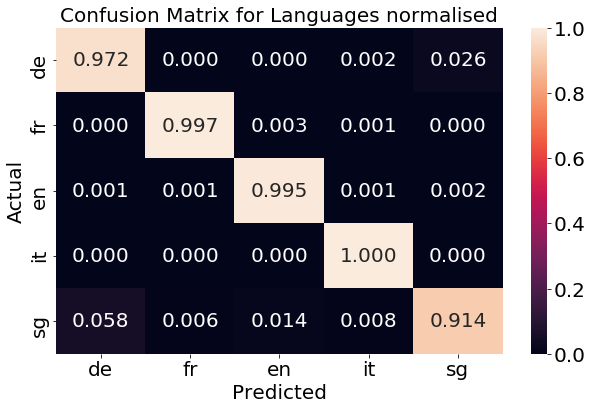

SMS RECALL
total samples    10692
total errors       655 (6.13%)
---------------------------------
languages detected
    de      468
    fr       43
    en       70
    it       74
    sg    10037


VALIDATION SET
             precision    recall  f1-score   support

         de     0.9237    0.9728    0.9476      2613
         fr     0.9950    0.9966    0.9958      2613
         en     0.9916    0.9985    0.9950      2613
         it     0.9943    0.9981    0.9962      2613
         sg     0.9738    0.9101    0.9409      2613

avg / total     0.9757    0.9752    0.9751     13065



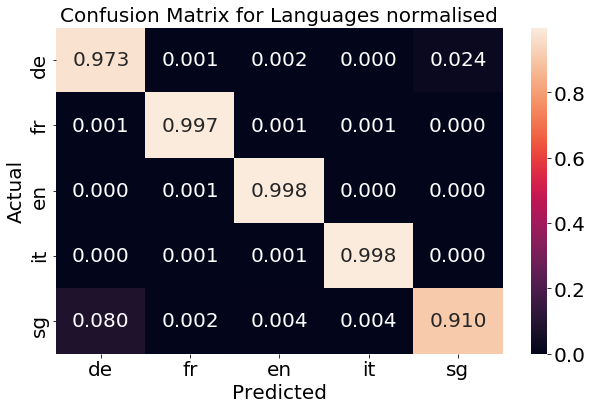

Errors per language:

  de:   71
  fr:    9
  en:    4
  it:    5
  sg:  235

Sample errors:

real|predicted  <sentence>
--------------------------
  sg|de   Zürcher Ratshausvortrag, gehalten am 7. März 1918, in: Neue Zürcher Zeitung 393/398 (1918).
  sg|de   Zwar überwiegt die Deutsche Sprache in Biel, aber die Zwei- bzw.
  de|sg   Der Arzneistoff enthält somit zwei Dimethylamino-Funktionen (siehe Box).
  de|fr   Frankreich ehrte sie mit der Aufnahme in die Légion d’Honneur und mit der „Médaille combattant de la Résistance“ sowie mit dem Croix de Guerre avec Palme.
  sg|de   Internationale Rechtshilfe in Strafsachen an die Republik Kroatien.
  sg|de   In Neue Zürcher Zeitung.
  sg|de   “Dass yb wider sicherer wird und au die mannschafte vernichtet - YB ohne Titel ist wie Weinachten ohne Schnee!”
  sg|de   Freut eim sälber.
  sg|de   Susanna Bliggenstorfer Titularprofessorin für Romanische Philologie unter bes.
  sg|de   Au mir, Oberwil, si ä Gränzgmein zu Frankrych.
  sg|de   Kommenta

In [24]:
clf = NaiveIdentifier(max_features=600) 
clf.fit(X_train, y_train)


print("TEST SET")
print("========")
y_pred = clf.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)

print("SMS RECALL")
print("==========")
test_recall_with_sms(clf)

print("\n\nVALIDATION SET")
print("===============")
y_pred = clf.predict(X_valid)
print_results(y_valid, y_pred)
plot_confusion_matrix(y_valid, y_pred, normalised=True)

print_errors_per_lang(y_valid, y_pred)
print_sample_errors(X_valid, y_valid, y_pred, limit=30)

# Plotting the number of features

In [103]:
import sklearn.metrics
import numpy as np

feature_sizes = [500, 700, 1000, 3000, 5000, 7000, 10000] 
accuracies = []
f1_scores = []
precisions = []
recalls = []

labels = [None] + [[i] for i in range(len(langs))]

for i in feature_sizes:
    clf = NaiveIdentifier(max_features=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
    
    f1_scores.append([ metrics.f1_score(y_test, y_pred, average="macro", labels=i) for i in labels ])    
    precisions.append([ metrics.precision_score(y_test, y_pred, average="macro", labels=i) for i in labels ])
    recalls.append([ metrics.recall_score(y_test, y_pred, average="macro", labels=i) for i in labels ])

In [104]:
f1s = np.array(f1_scores)
precs = np.array(precisions)
recs = np.array(recalls)

In [91]:
langs

['de', 'fr', 'en', 'it', 'sg']

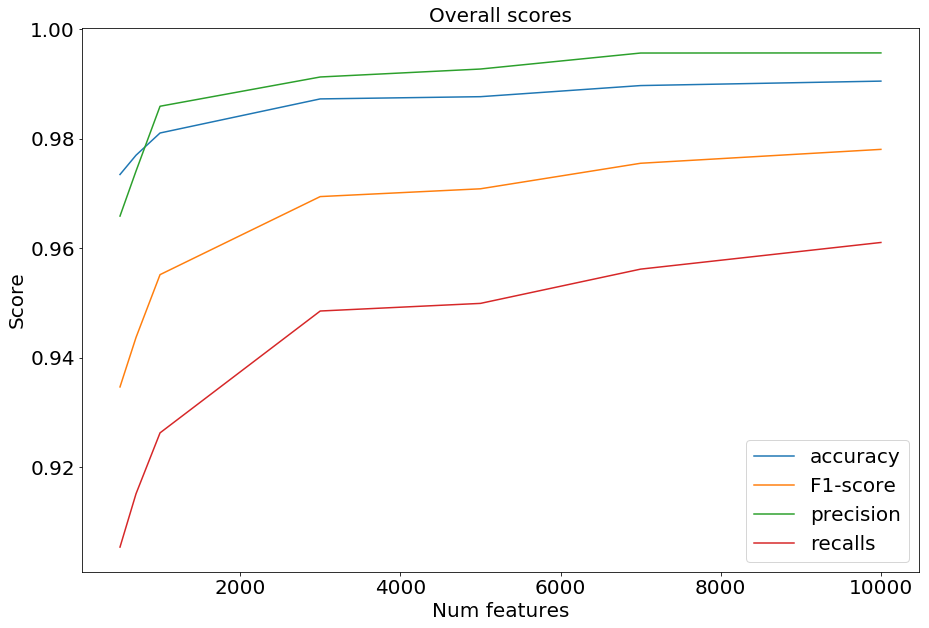

In [118]:
plt.figure(figsize=(15,10))

lg = 5
plt.plot(feature_sizes, accuracies, label="accuracy")
plt.plot(feature_sizes, f1s[:,lg], label="F1-score")
plt.plot(feature_sizes, precs[:,lg], label="precision")
plt.plot(feature_sizes, recs[:,lg], label="recalls")

plt.title("Overall scores")
plt.xlabel("Num features")
plt.ylabel("Score")

_ = plt.legend()

In [109]:
list(zip(langs, range(1, len(langs)+1)))

[('de', 1), ('fr', 2), ('en', 3), ('it', 4), ('sg', 5)]

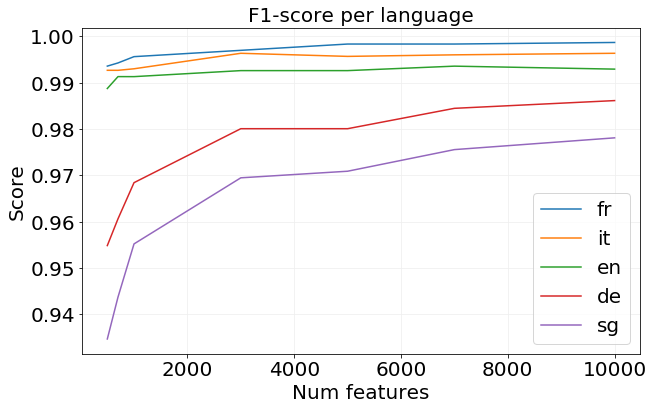

In [117]:
plt.figure(figsize=(10,6))

#plt.plot(feature_sizes, f1s[:,0], label="F1-score")
for i in [2,4,3,1,5]:
    plt.plot(feature_sizes, f1s[:,i], label=langs[i-1])
    #plt.plot(feature_sizes, precs[:,lg], label="precision [%s]" % langs[i-1])

plt.grid(c="#efefef")
plt.xlabel("Num features")
plt.ylabel("Score")
plt.title("F1-score per language")
_ = plt.legend()

## Conclusion

As you can see, the results are pretty good: for Swiss German sentences, the f1 score on the test set is ~ 98% !

However, by running the model on the SMS validation set, we can see that Swiss German and Standard German are often confused. More surprising, english is also difficult to predict.